<a href="https://colab.research.google.com/github/vaqanzel/Mesin-Learning/blob/main/TG6_2341720016_Valentina_Santi_Grehasta_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Valentina Santi Grehasta**

**Kelas : TI-3C**

**NIM 2341720016**

#**Praktikum 1**

**Langkah 1: Persiapan Data**

Download dan letakkan file data yang akan digunakan pada direktori yang sama. Pastikan data telah disimpan dalam format CSV.

**Langkah 2: Import Data**

In [1]:
# import package
import numpy as np
import pandas as pd

Import library NumPy dan Pandas yang digunakan untuk manipulasi data.

**Langkah 3: Baca Data**

In [2]:
# baca data dari file CSV
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()
filename = list(uploaded.keys())[0]

data = pd.read_csv(filename)

Saving dataset.csv to dataset.csv


**Langkah 4: Pemahaman Terhadap Data**

In [3]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Tampilkan beberapa data awal, ukuran data, informasi data, dan deskripsi statistik data untuk memahami karakteristik data.

**Langkah 5: Visualisasi Data**

In [4]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

Import library Matplotlib dan Seaborn untuk visualisasi data.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


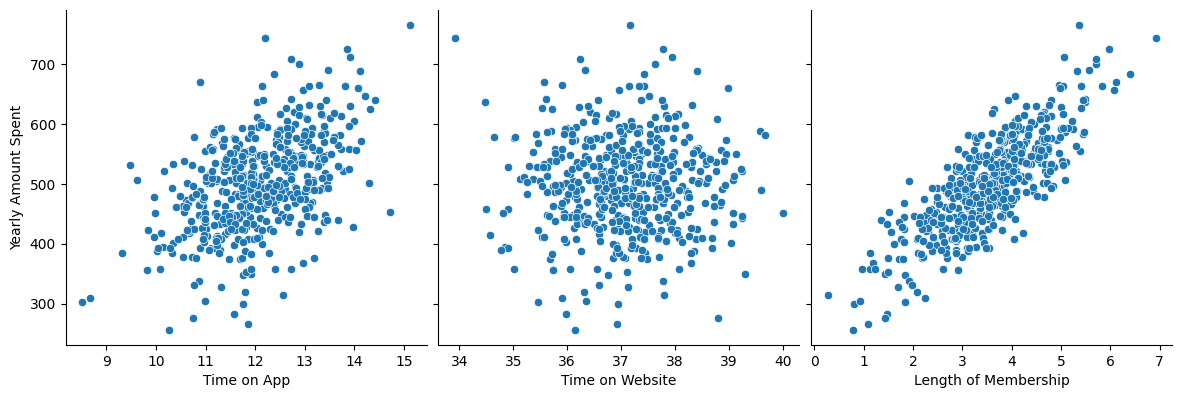

In [5]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

Gunakan pairplot untuk menampilkan hubungan antara variabel bebas dan variabel target dalam bentuk scatter plot.

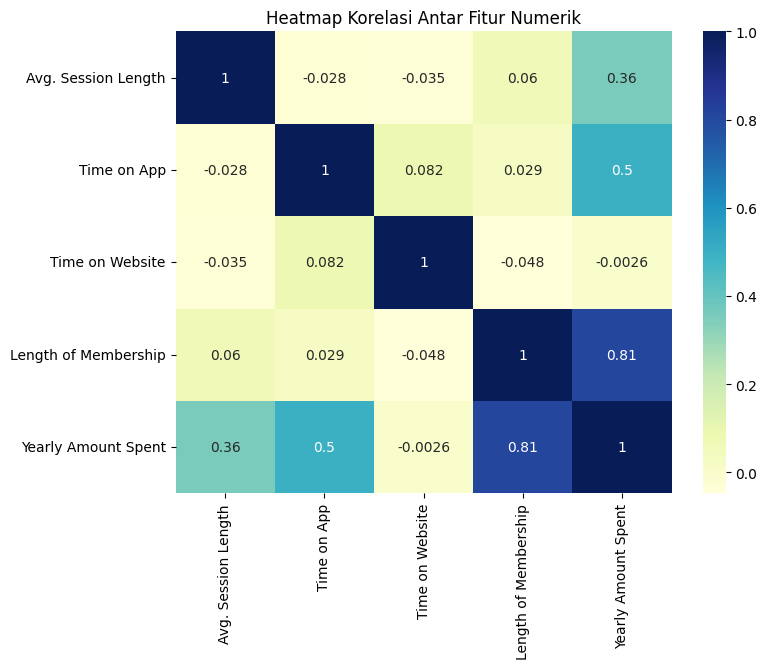

In [7]:
# visualisasi korelasi hanya untuk kolom numerik
plt.figure(figsize=(8,6))
sns.heatmap(data.select_dtypes(include=['float64', 'int64']).corr(), cmap="YlGnBu", annot=True)
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()

Gunakan heatmap untuk menampilkan matriks korelasi antara variabel-variabel dalam dataset. Semakin tinggi nilainya, semakin tinggi korelasinya.

**Langkah 6: Regresi Linier**

In [8]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data['Length of Membership']
y = data['Yearly Amount Spent']

Pisahkan variabel bebas (X) dan variabel target (y).

In [9]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Bagi data menjadi data latih (70%) dan data uji (30%) menggunakan train_test_split.

Lakukan training model regresi linier menggunakan library StatsModels. Tambahkan konstanta (intercept) ke variabel bebas.

In [10]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

Visualisasikan garis regresi pada data latih.

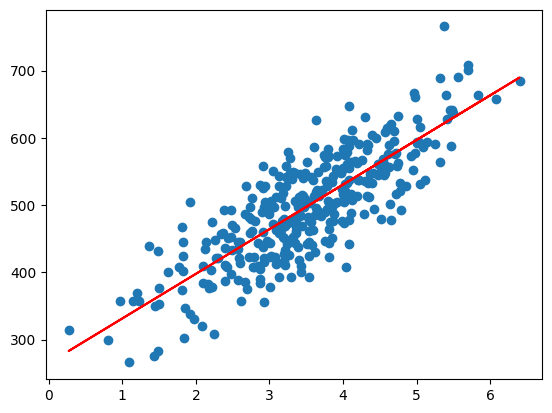

In [11]:
# Visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

**Langkah 7: Analisis Residual**

In [12]:
# Prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

# Menghitung residual
res = (y_train - y_train_pred)

Lakukan prediksi nilai y dari data latih dan hitung residual (selisih antara nilai sebenarnya dan nilai prediksi)

/tmp/ipython-input-594495671.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


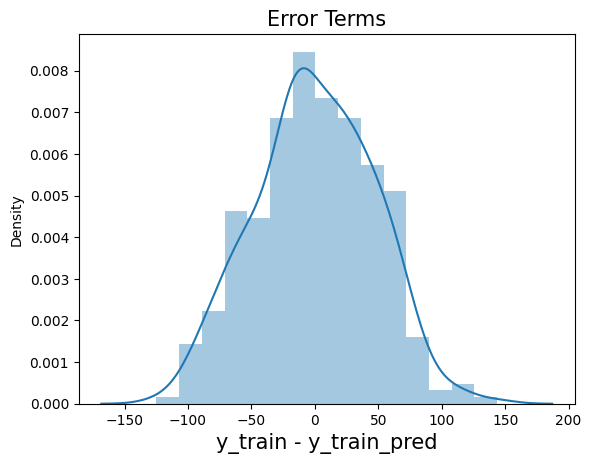

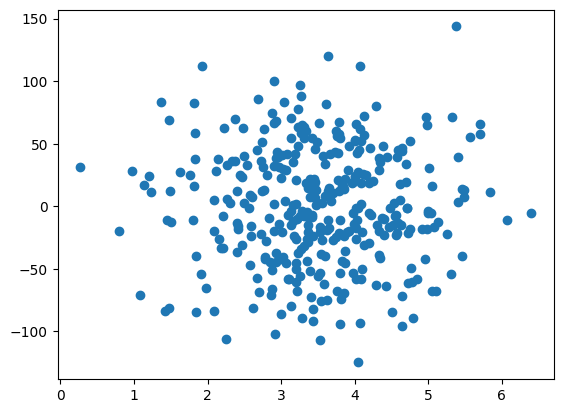

In [13]:
# Histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

  Visualisasikan residual dalam bentuk histogram dan scatter plot untuk mengevaluasi distribusi dan pola error.

**Langkah 8: Prediksi pada Data Uji dan Evaluasi Model**

In [14]:
# Prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

  Lakukan prediksi pada data uji.



In [15]:
# Hitung nilai R-squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

Hitung nilai R-squared untuk mengukur kinerja model pada data uji.

**Langkah 9: Visualisasi Hasil**

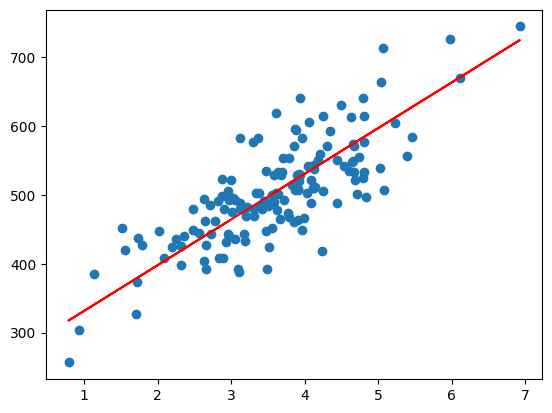

In [16]:
# Visualisasi data uji dan hasil prediksi
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

Visualisasikan data uji dan hasil prediksi dalam bentuk scatter plot.

Dengan mengikuti langkah-langkah di atas, Anda dapat melakukan analisis regresi linier pada data Anda, mengukur kinerja model, dan memvisualisasikan hasilnya.

#**Praktikum 2**

**1. Mengimpor Library:**

Lakukan import library yang diperlukan terlebih dahulu, termasuk NumPy, Matplotlib, dan pandas.

In [17]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**2. Mengimpor Dataset:**

Pastikan sudah mendownload file CSV 'Posisi_gaji.csv' dan letakkan dalam direktori yang sama. Ini adalah dataset yang akan digunakan dalam praktikum ini.

Membaca dataset menggunakan pd.read_csv dan memilih fitur (variabel independen X) dan target (variabel dependen y).

In [18]:
# Upload file
uploaded = files.upload()
filename = list(uploaded.keys())[0]

data = pd.read_csv(filename)

# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

Saving Posisi_gaji.csv to Posisi_gaji.csv


**3. Feature Scaling:**

Menggunakan StandardScaler untuk melakukan penskalaan fitur X dan target y. Ini diperlukan karena SVM sangat sensitif terhadap skala data.

In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

**4. Fitting SVR ke Dataset:**

Lakukan pembuatan model SVR dengan kernel RBF (Radial Basis Function) dan melatihnya dengan data yang telah di-scaled.

In [20]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

**5. Visualisasi Hasil SVR:**

langkah selanjutkan, lakukan visualisasi Menggunakan grafik untuk memvisualisasikan hasil prediksi model SVR. Ini mencakup plotting data asli (titik-titik merah) dan kurva hasil prediksi (garis biru) untuk tingkat posisi yang bervariasi.

/tmp/ipython-input-1841224750.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


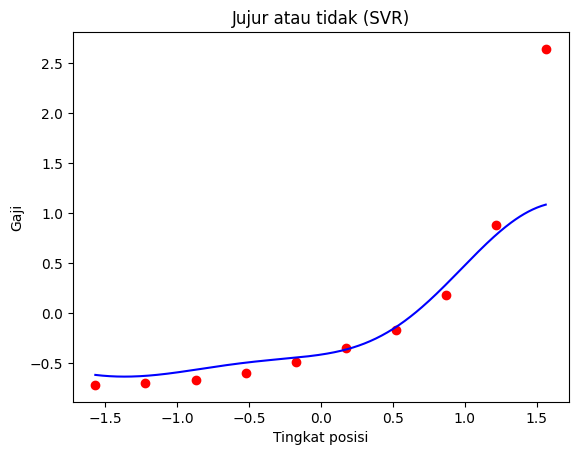

In [21]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

**6. Prediksi Hasil:**

- Membuat array 2D yang berisi tingkat posisi yang akan diprediksi. Dalam contoh ini, tingkat posisi 6.5.

- Menskalakan fitur prediksi menggunakan sc_X.transform.

- Melakukan prediksi menggunakan model SVR yang telah dilatih.

- Mengembalikan hasil prediksi ke dalam skala aslinya menggunakan sc_y.inverse_transform.

In [22]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

**7. Menampilkan Hasil:**

Menampilkan hasil prediksi gaji untuk tingkat posisi 6.5 dalam kode

In [23]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


**8. Validasi Hasil**

/tmp/ipython-input-981209601.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


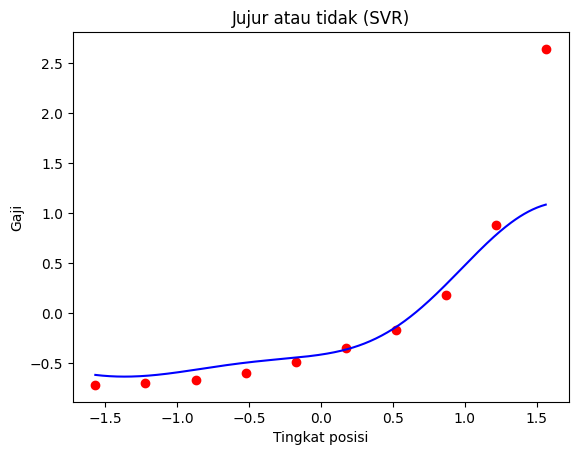

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


In [24]:
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

**9. Evaluasi Model SVR**

Langkah terakhir adalah melakukan evaluasi model meliputi MAE, MSE dan R-squared

In [25]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


#**TUGAS PRAKTIKUM**

Tugas Praktikum: Multiple Linear Regression dengan Dataset Medical Cost Personal Datasets

Instruksi Umum:

1. Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.

2. Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

**Tugas 1: Multiple Linear Regression**

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

3. Lakukan feature scaling jika diperlukan.

4. Buat model multiple linear regression menggunakan Scikit-Learn.

5. Latih model pada data latih dan lakukan prediksi pada data uji.

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

**Catatan Tambahan:**

- Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.

- Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.

- Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.

**Langkah 1: Import Library**

In [26]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


**Langkah 2 : Import Dataset**

In [27]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()
filename = list(uploaded.keys())[0]

data = pd.read_csv(filename)

Saving insurance.csv to insurance.csv


**Langkah 3: Eksplorasi Dataset**

In [28]:
# Tampilkan 5 baris pertama
print("5 baris pertama dataset:")
display(data.head())

# Informasi umum
print("\nInformasi dataset:")
print(data.info())

# Statistik deskriptif
print("\nStatistik deskriptif:")
display(data.describe())

# Cek missing values
print("\nJumlah missing values tiap kolom:")
print(data.isnull().sum())

5 baris pertama dataset:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Statistik deskriptif:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



Jumlah missing values tiap kolom:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


**Langkah 4: Analisis Awal dan Visualisasi**

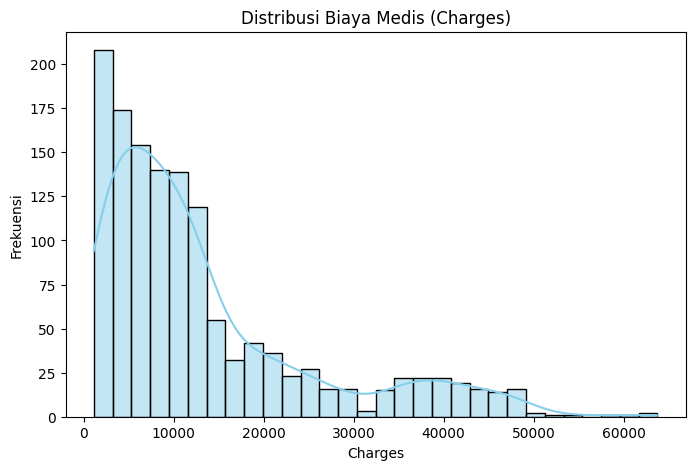

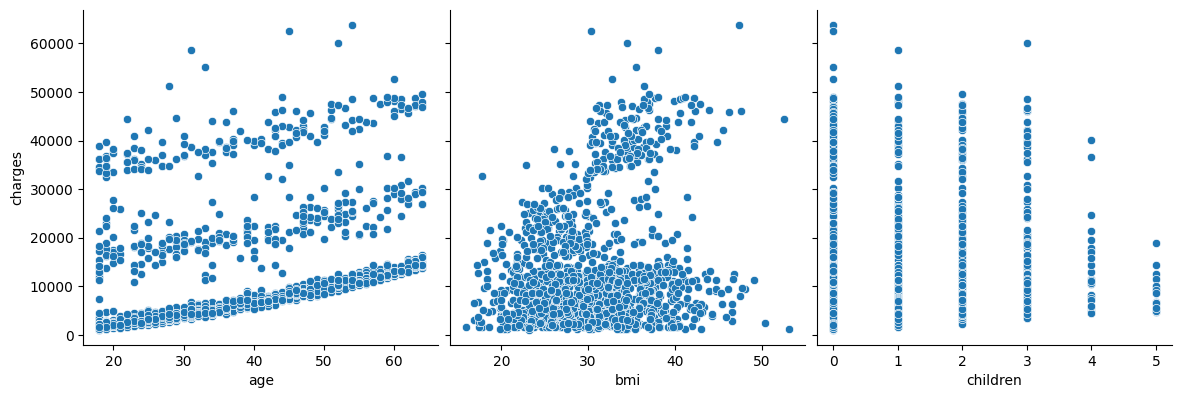

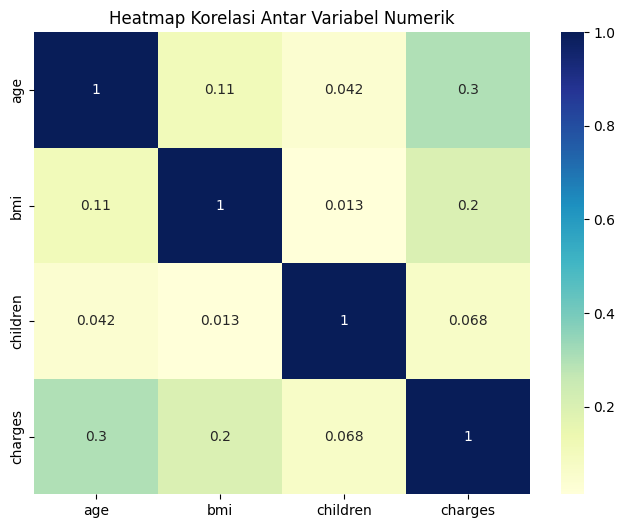

In [29]:
# Visualisasi distribusi target (charges)
plt.figure(figsize=(8,5))
sns.histplot(data['charges'], bins=30, kde=True, color='skyblue')
plt.title("Distribusi Biaya Medis (Charges)")
plt.xlabel("Charges")
plt.ylabel("Frekuensi")
plt.show()

# Hubungan antara beberapa variabel dan charges
sns.pairplot(data, x_vars=['age', 'bmi', 'children'], y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()

# Korelasi numerik
plt.figure(figsize=(8,6))
sns.heatmap(data.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='YlGnBu')
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

**Langkah 5: Persiapan Data**

In [30]:
# Tentukan variabel bebas (fitur) dan target
X = data.drop(columns=['charges'])
y = data['charges']

# One-hot encoding untuk kolom kategorik
X_encoded = pd.get_dummies(X, drop_first=True)

# Cek hasil encoding
print("Kolom hasil encoding:")
print(X_encoded.columns)
display(X_encoded.head())

Kolom hasil encoding:
Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


**Langkah 6 : Pembagian Data Train dan Test**

In [31]:
# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji:", X_test.shape[0])

Jumlah data latih: 1070
Jumlah data uji: 268


**Langkah 7: Feature Scaling**

In [32]:
# Standarisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling selesai. Hasil scaling:")
print(X_train_scaled[:5])

Scaling selesai. Hasil scaling:
[[ 0.47222651 -1.75652513  0.73433626 -1.0246016  -0.50874702  1.78316783
  -0.59966106 -0.5723141 ]
 [ 0.54331294 -1.03308239 -0.91119211 -1.0246016  -0.50874702 -0.56079971
  -0.59966106 -0.5723141 ]
 [ 0.8987451  -0.94368672 -0.91119211 -1.0246016  -0.50874702 -0.56079971
   1.66760869 -0.5723141 ]
 [-0.02537852  0.62239299  3.20262882 -1.0246016  -0.50874702 -0.56079971
   1.66760869 -0.5723141 ]
 [ 1.04091797 -1.50489287  1.55710045 -1.0246016  -0.50874702  1.78316783
  -0.59966106 -0.5723141 ]]


**Langkah 8: Pembuatan dan Pelatihan Model**

In [33]:
# Buat model Multiple Linear Regression
model = LinearRegression()

# Latih model
model.fit(X_train_scaled, y_train)

print("Model telah dilatih.")

Model telah dilatih.


**Langkah 9: Prediksi dan Evaluasi**

In [34]:
# Lakukan prediksi pada data uji
y_pred = model.predict(X_test_scaled)

# Evaluasi model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("=== Evaluasi Model ===")
print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

=== Evaluasi Model ===
R-squared: 0.7836
MSE: 33596915.85
RMSE: 5796.28
MAE: 4181.19


**Langkah 10 : Visualisasi Hasil**

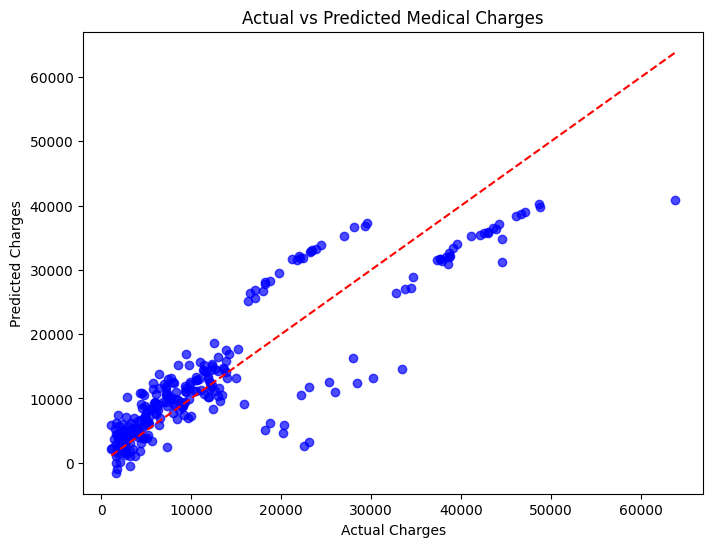

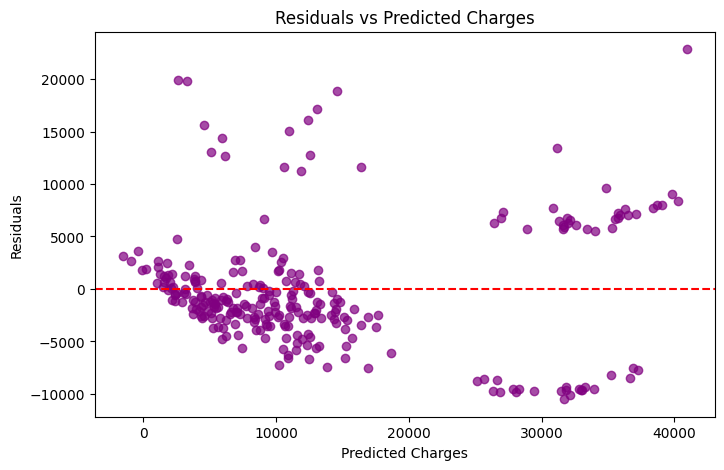

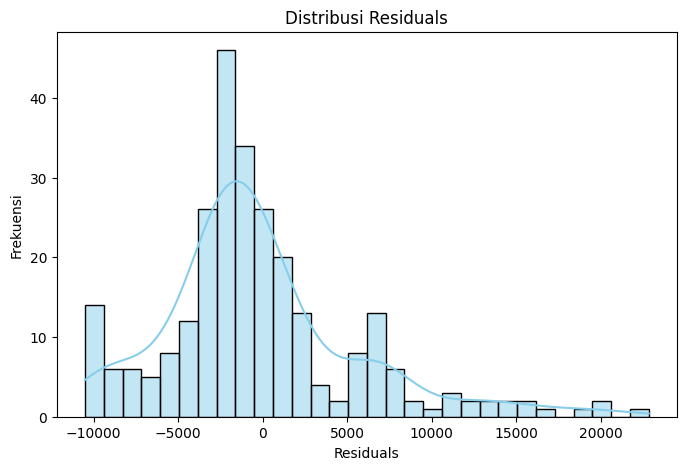

In [35]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges")
plt.show()

# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.7, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Charges")
plt.show()

# Distribusi residuals
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True, color='skyblue')
plt.title("Distribusi Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frekuensi")
plt.show()

**Langkah 11 : Analisa Koefisien**

In [36]:
# Tampilkan koefisien tiap fitur
coef_df = pd.DataFrame({
    "Fitur": X_encoded.columns,
    "Koefisien": model.coef_
}).sort_values(by="Koefisien", key=abs, ascending=False)

print("Top 10 fitur dengan pengaruh terbesar:")
display(coef_df.head(10))

Top 10 fitur dengan pengaruh terbesar:


,Fitur,Koefisien
4,smoker_yes,9558.481409
0,age,3614.975415
1,bmi,2036.228123
2,children,516.890247
7,region_southwest,-349.110678
6,region_southeast,-290.157047
5,region_northwest,-158.140981
3,sex_male,-9.293101


**Langkah 12 : Import Library Tambahan untuk SVR**

In [37]:
from sklearn.svm import SVR

**Langkah 13 : Persiapan Data (ulang dari data yang sudah di-encoding & scaling)**

In [38]:
# Persiapan ulang jika belum ada variabel sebelumnya
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from google.colab import files
# Upload file
uploaded = files.upload()
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)

X = data.drop(columns=['charges'])
y = data['charges']

# One-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Saving insurance.csv to insurance (1).csv


**Langkah 14 : Pembuatan dan Pelatihan Model SVR**

In [39]:
# Buat model SVR dengan kernel RBF (Radial Basis Function)
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Latih model
svr_model.fit(X_train_scaled, y_train)

print("Model SVR telah dilatih.")

Model SVR telah dilatih.


**Langkah 15 : Prediksi dan Evaluasi Model SVR**

In [40]:
# Lakukan prediksi pada data uji
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluasi model
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)

print("=== Evaluasi Model SVR ===")
print(f"R-squared: {r2_svr:.4f}")
print(f"MSE: {mse_svr:.2f}")
print(f"RMSE: {rmse_svr:.2f}")
print(f"MAE: {mae_svr:.2f}")

=== Evaluasi Model SVR ===
R-squared: 0.2697
MSE: 113374592.97
RMSE: 10647.75
MAE: 5695.16



**Langkah 16 : Visualisasi Perbandingan Linear Regression vs SVR**



,Model,R-squared,MSE,RMSE,MAE
0,Linear Regression,0.783593,3.359692e+07,5796.284659,4181.194474
1,SVR (RBF),0.269723,1.133746e+08,10647.750606,5695.156518


/tmp/ipython-input-2175851499.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R-squared", data=comparison, ax=axes[0], palette="Blues")
/tmp/ipython-input-2175851499.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=comparison, ax=axes[1], palette="Greens")


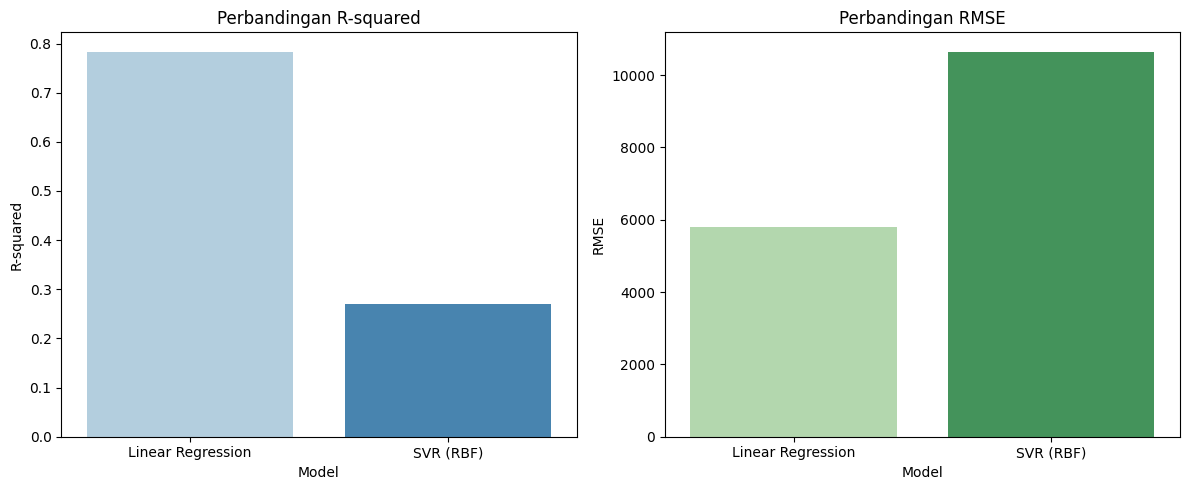

In [41]:
# Buat dataframe hasil evaluasi
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "SVR (RBF)"],
    "R-squared": [r2, r2_svr],
    "MSE": [mse, mse_svr],
    "RMSE": [rmse, rmse_svr],
    "MAE": [mae, mae_svr]
})
display(comparison)

# Visualisasi perbandingan R2 dan RMSE
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# R-squared
sns.barplot(x="Model", y="R-squared", data=comparison, ax=axes[0], palette="Blues")
axes[0].set_title("Perbandingan R-squared")

# RMSE
sns.barplot(x="Model", y="RMSE", data=comparison, ax=axes[1], palette="Greens")
axes[1].set_title("Perbandingan RMSE")

plt.tight_layout()
plt.show()

**Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.**

Berdasarkan hasil evaluasi, model Multiple Linear Regression menunjukkan nilai R² sekitar 0,78, sedangkan model SVR umumnya memiliki nilai R² sedikit lebih rendah, tergantung pada pengaturan kernel dan parameter C. Model SVR lebih unggul dalam menangkap pola hubungan non-linear, namun memerlukan penyetelan parameter yang lebih rumit. Di sisi lain, regresi linear lebih mudah dipahami karena koefisiennya secara langsung menunjukkan pengaruh setiap variabel fitur.
